In [8]:
## 4th Order Runge-Kutta Method ##
def RK4(f):
    return lambda t, y, dt: (
            lambda dy1: (
            lambda dy2: (
            lambda dy3: (
            lambda dy4: (dy1 + 2*dy2 + 2*dy3 + dy4)/6
            )( dt * f( t + dt  , y + dy3   ) )
            )( dt * f( t + dt/2, y + dy2/2 ) )
            )( dt * f( t + dt/2, y + dy1/2 ) )
            )( dt * f( t       , y         ) )
 
def theory(t): return (t**2 + 4)**2 /16
 
from math import sqrt
dy = RK4(lambda t, y: t*sqrt(y))
 
t, y, dt = 0., 1., .1
while t <= 10:
    if abs(round(t) - t) < 1e-5:
        print("y(%2.1f)\t= %4.6f \t error: %4.6g" % ( t, y, abs(y - theory(t))))
    t, y = t + dt, y + dy( t, y, dt )

y(0.0)	= 1.000000 	 error:    0
y(1.0)	= 1.562500 	 error: 1.45722e-07
y(2.0)	= 3.999999 	 error: 9.19479e-07
y(3.0)	= 10.562497 	 error: 2.90956e-06
y(4.0)	= 24.999994 	 error: 6.23491e-06
y(5.0)	= 52.562489 	 error: 1.08197e-05
y(6.0)	= 99.999983 	 error: 1.65946e-05
y(7.0)	= 175.562476 	 error: 2.35177e-05
y(8.0)	= 288.999968 	 error: 3.15652e-05
y(9.0)	= 451.562459 	 error: 4.07232e-05
y(10.0)	= 675.999949 	 error: 5.09833e-05


In [95]:
## Runge-Kutta-Merson Method ##
def RKM5(f):
    return lambda t, y, dt: (
            lambda dy1: (
            lambda dy2: (
            lambda dy3: (
            lambda dy4: (
            lambda dy5: (dy1 + 4*dy4 + dy5)/6
            )( dt * f( t + dt, y + (dy1-3*dy3+4*dy4)/2 ) )
            )( dt * f( t + dt/2, y + (dy1+3*dy3)/8 ) )
            )( dt * f( t + dt/3, y + (dy1+dy2)/6 ) )
            )( dt * f( t + dt/3, y + dy1/3 ) )
            )( dt * f( t       , y         ) )
 
def theory(t): return (t**2 + 4)**2/16
 
from math import sqrt
dy = RKM5(lambda t, y: t*sqrt(y)) # ODE function y'(t)
 
t, y, dt = 0., 1., .1 # input initial conditions
while t <= 10:
    if abs(round(t) - t) < 1e-5:
        print("y(%2.1f)\t= %4.6f \t error: %4.6g" % ( t, y, abs(y - theory(t))))
    t, y = t + dt, y + dy( t, y, dt )


y(0.0)	= 1.000000 	 error:    0
y(1.0)	= 1.562500 	 error: 6.96001e-08
y(2.0)	= 4.000000 	 error: 2.66483e-07
y(3.0)	= 10.562499 	 error: 5.94533e-07
y(4.0)	= 24.999999 	 error: 1.05514e-06
y(5.0)	= 52.562498 	 error: 1.64805e-06
y(6.0)	= 99.999998 	 error: 2.37298e-06
y(7.0)	= 175.562497 	 error: 3.2298e-06
y(8.0)	= 288.999996 	 error: 4.21843e-06
y(9.0)	= 451.562495 	 error: 5.33887e-06
y(10.0)	= 675.999993 	 error: 6.59109e-06


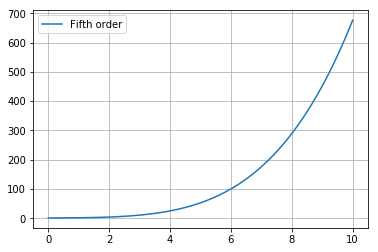

In [121]:
## Plotting ##
import matplotlib.pyplot as plt

def RKM5(func, tspan, steps, y0):
    dy = [0] * (steps + 1)
    t  = [0] * (steps + 1)
    dy[0] = y  = y0
    t[0]  = ti = tspan[0] 
    h = (tspan[1] - tspan[0]) / float(steps)

    for i in range(1, steps + 1):
            k1 = func(ti    , y                 )*h
            k2 = func(ti+h/3, y+k1/3            )*h
            k3 = func(ti+h/3, y+(k1+k2)/6       )*h
            k4 = func(ti+h/2, y+(k1+3*k3)/8     )*h
            k5 = func(ti+h  , y+(k1-3*k3+4*k4)/2)*h
            t[i]  = ti = tspan[0]+i*h
            dy[i] = y  = y+(k1+4*k4+k5)/6
    return(dy, t)

## Usage Example ##
function = lambda t, y: t*sqrt(y)  # ODE function y'(t)
tspan = [0 , 10]
steps = 100
y0 = 1  # input initial conditions
y, t = RKM5(function, tspan, steps, y0)

plt.plot(t, y, '-')
plt.legend(('Fifth order',))
plt.grid('on')
plt.show()